# Exercicio 7
- Edgar Tanaka
- RA 023577
- Machine Learning (Prof. Jacques Wainer)

Os dados quakes.csv representam dodos reais de terremotos (nao sei de que periodo). A primeira coluna é a profundidado do terremoto, a segunda e terceira a latitude e longitude, e a quarta a scala Richer do terremoto. Nos queremos discobrir se ha clusters/grupos de terremotos.

Estandarize cada coluna

* Rode o K-means para K=2..10, use random_state=1, e imprima (com 2 casas decimais) a silueta media e o indice de Calinski-Harabaz. Qual parece ser o melhor valor/valores para K?

* Talvez os dados de latitude e longitude estao estragando a clusterizacao. Remova essa colunas e repita a tarefa acima? Discuta os resultados

* Rode a clusterizacao hierarquica (metodo Ward) para 2..10 clusters para os dados de 4 dimensoes e calcule os 2 indices acima? Qual o melhor/melhores valores do numero de clusters?

* Rode o DBScan nos dados de 4 dimensoes. Use 5 como min_samples. Construa o grafico da distancia dos 5-NN e descubra o valor do eps. (Se voce nao conseguir gerar o grafico, use eps = 0.75 mas essa opcao perderÃ¡ alguns pontos nesta questao). Qual o nÃºmero de clusters? Calcule os indices acima para os clusteres.

* Discuta quantos clusters voce acha apropriado para esse problema.



# KMeans: 4 dimensões

O score silhouette vai de -1 a +1, onde +1 indica que os clusters estão mais bem separados de acordo com a distância euclidiana. A diferença entre os scores variou pouco: 0.32 a 0.37. O score silhouette mais alto (0.37) foi com o K=7.

Já de acordo com o Calinski-Harabaz, quanto maior o score Calinski-Harabaz, melhor é a clusterização. Sendo assim, o K ideal é igual a 6. O score foi de 1002.26.

,K,score
0,2.0,0.32
1,3.0,0.35
2,4.0,0.34
3,5.0,0.34
4,6.0,0.36
5,7.0,0.37
6,8.0,0.36
7,9.0,0.36
8,10.0,0.35


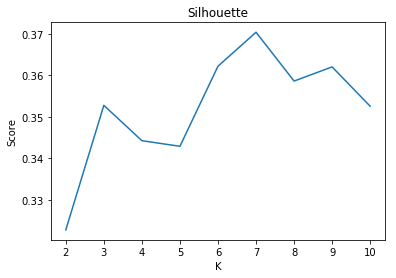

,K,score
0,2.0,675.01
1,3.0,785.77
2,4.0,866.69
3,5.0,957.38
4,6.0,1002.26
5,7.0,971.18
6,8.0,949.16
7,9.0,938.17
8,10.0,925.82


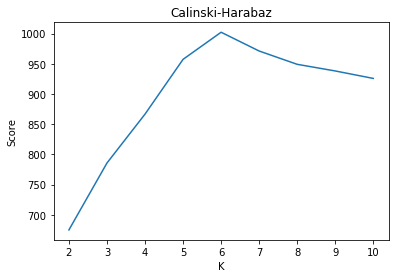

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cluster, metrics
import matplotlib.pyplot as plt
from IPython.display import display, HTML

MAX_CLUSTERS = 10

def plot_scores(scores, title): 
    k_values = range(2, MAX_CLUSTERS+1)
    
    # print table with scores vs K
    scores_df = pd.DataFrame.from_records([k_values, scores]).transpose()
    scores_df.columns = ['K','score']
    scores_df = scores_df.round({'K': 0, 'score': 2})
    display(scores_df)
    
    # plot scores vs K
    plt.plot(k_values, scores)
    plt.title(title)
    plt.xlabel('K')
    plt.ylabel('Score')
    plt.show()

    
def get_data_standardized():
    X = pd.read_csv('quakes.csv', names=['deep', 'lat', 'lon', 'richter'])

    # standardization 
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(X)
    

def run_kmeans(X):
    silhouettes = []
    calinskis = []
    
    for k in range(2, MAX_CLUSTERS+1):
        # kmeans
        kmeans = cluster.KMeans(n_clusters=k, random_state=1).fit(X)

        # silhouette
        score = metrics.silhouette_score(X=X, labels=kmeans.labels_, random_state=1)
        silhouettes.append(score)

        # Calinski-Harabaz
        score = metrics.calinski_harabaz_score(X=X, labels=kmeans.labels_)
        calinskis.append(score)
    
    plot_scores(silhouettes, 'Silhouette')
    plot_scores(calinskis, 'Calinski-Harabaz')  


X = get_data_standardized()
run_kmeans(X)

# KMeans: Análise do K (2 dimensões)

Ao removermos as dimensões de latitude e longitude, os scores Silhouette e Calinski-Harabaz geraram conclusões opostas.

Para o Silhouette, o melhor K é igual a 2 (o score foi de 0.88).

Para o Calinski-Harabaz, o melhor K é igual a 10 (o score foi de 28131.13)

Como podemos notar, as conclusões foram praticamente opostas o que indica que remover a latitude e longitude não permitiu uma boa clusterização.

,K,score
0,2.0,0.88
1,3.0,0.73
2,4.0,0.71
3,5.0,0.61
4,6.0,0.58
5,7.0,0.57
6,8.0,0.57
7,9.0,0.57
8,10.0,0.57


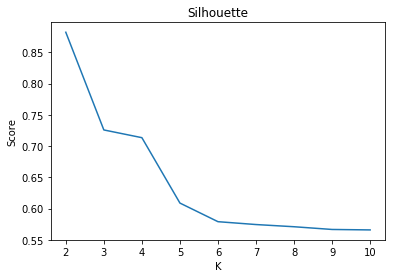

,K,score
0,2.0,9304.49
1,3.0,11845.08
2,4.0,12687.19
3,5.0,15552.20
4,6.0,20092.87
5,7.0,21289.21
6,8.0,23735.15
7,9.0,25838.82
8,10.0,28131.13


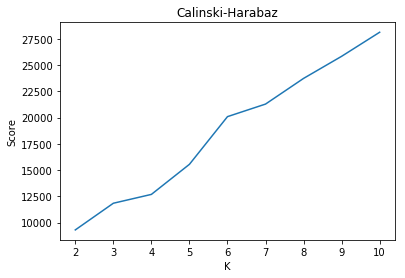

In [4]:
X = pd.read_csv('quakes.csv', names=['deep', 'lat', 'lon', 'richter'])

# remove lat and lon
del X['lat']
del X['lon']
run_kmeans(X)

# Ward

Analisando os índices Silhouette, o melhor K seria K=3. No entanto, devido à pequena diferença, os índices para K=7 e K=10 também são bons. 

Para o índice Calinski-Harabaz, K=5 se mostra como a melhor clusterização. O range entre K=6 e K=10 também parecem ser boas clusterizações.

,K,score
0,2.0,0.31
1,3.0,0.33
2,4.0,0.26
3,5.0,0.29
4,6.0,0.31
5,7.0,0.31
6,8.0,0.31
7,9.0,0.31
8,10.0,0.32


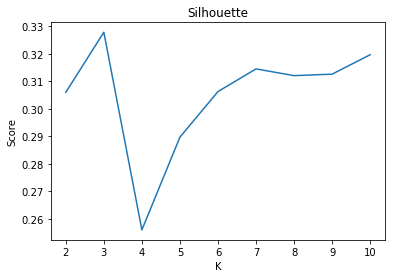

,K,score
0,2.0,536.44
1,3.0,698.08
2,4.0,731.08
3,5.0,771.95
4,6.0,750.03
5,7.0,741.82
6,8.0,733.85
7,9.0,745.43
8,10.0,749.07


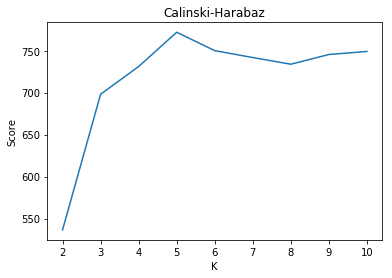

In [5]:
def run_ward(X):
    silhouettes = []
    calinskis = []
    
    for k in range(2, MAX_CLUSTERS+1):
        # kmeans
        ward = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)

        # silhouette
        score = metrics.silhouette_score(X=X, labels=ward.labels_)
        silhouettes.append(score)

        # Calinski-Harabaz
        score = metrics.calinski_harabaz_score(X=X, labels=ward.labels_)
        calinskis.append(score)
    
    plot_scores(silhouettes, 'Silhouette')
    plot_scores(calinskis, 'Calinski-Harabaz')  
    
def ward_all():
    X = get_data_standardized()
    run_ward(X)
    
ward_all()

# DBScan: find eps

Ao plotarmos as distâncias 5-NN para todos os pontos, podemos perceber um "joelho" no gráfico quando a distância é maior que 0.75. Isso significa que podemos usar eps=0.75 para o DBScan.

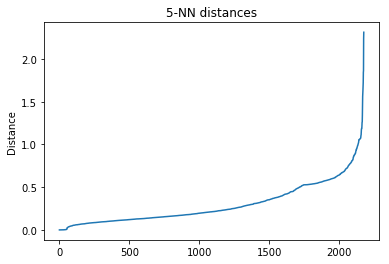

In [15]:
def find_eps():
    import numpy as np
    from sklearn.neighbors import NearestNeighbors
    X = get_data_standardized()
    
    # we use 6 here because it also includes each point itself in the distances
    neigh = NearestNeighbors(n_neighbors=6) 
    neigh.fit(X)
    dist, ind = neigh.kneighbors(X, return_distance=True)    
    plt.plot(np.sort(np.array(dist[:,-1]).flatten()))
    plt.title('5-NN distances')
    plt.ylabel('Distance')
    plt.show()
    
find_eps()

# DBScan: cluster and scores

Usando eps=0.75, executamos o DBScan e obtivemos 7 clusters.

Ao calcular os índices Silhouette e Calinski-Harabaz, notamos que seu valor está consideravelmente abaixo das outras clusterizações com Ward e KMeans. Enquanto que o Silhouette estava por volta de 0.35 no Ward e no KMeans, no DBScan este valor caiu para 0.19. Quando comparamos o índice Calinski-Harabaz, a queda foi de 3 dígitos (aproximadamente 750) para 2 dígitos (51.42).

In [9]:
def dbscan_all():
    X = get_data_standardized()
    db = cluster.DBSCAN(eps=0.75, min_samples=5).fit(X)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Number of clusters: %d' % n_clusters_)
    
    # silhouette
    score = metrics.silhouette_score(X=X, labels=db.labels_)
    print("Silhouette:", round(score, 2))

    # Calinski-Harabaz
    score = metrics.calinski_harabaz_score(X=X, labels=db.labels_)
    print("Calinski-Harabaz:", round(score, 2))
     
dbscan_all()

Number of clusters: 7
Silhouette: 0.19
Calinski-Harabaz: 51.42


# Conclusões finais

Tanto para o KMeans (4 dimensões), Ward e DBScan o valor de K=7 parece uma boa clusterização. De forma mais geral, eu diria que K=6 e K=7 parecem ser boas clusterizações para estes dados. Alguns outros valores também apareceram como valores de K interessantes mas não foi algo consistente nos 3 experimentos executados neste exercício.

# References
* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

